# I. Perkenalan

> Nama : Handwitanto  
> Batch : RMT_36  
> Dataset : [Insurance.csv](https://raw.githubusercontent.com/FTDS-learning-materials/datasets/main/insurance.csv)

# II. Business Understanding

## SMART

> **Specific** : Berapa biaya yang harus dikeluarkan untuk mendapatkan health-insurance di USA  
> **Measurable** : Mendapatkan kisaran biaya yang harus dikeluarkan dengan melihat dan melakukan perhitungan pada dataset yang ada  
> **Achievable** : Melakukan riset dan analisis pada dataset yang sudah didapatkan  
> **Relevant** : Menentukan faktor yang mempengaruhi besaran biaya yang diperlukan untuk   mendapatkan health-insurance di USA  
> **Time-Bound** : 1 jam  

## Problem Statement


> Berapa biaya yang harus dikeluarkan untuk mendapatkan asuransi kesehatan di USA? Untuk menjawab pertanyaan ini, kami akan melakukan analisis pada dataset terkait asuransi kesehatan untuk menghitung dan mendapatkan kisaran biaya yang diperlukan. Riset ini akan dilakukan dengan mempertimbangkan berbagai faktor yang memengaruhi besaran premi asuransi, seperti usia, lokasi, dan kondisi kesehatan. Dalam waktu 1 jam, analisis data ini diharapkan dapat memberikan gambaran kisaran biaya asuransi yang dibutuhkan berdasarkan faktor-faktor tersebut.

# III. Data Loading

> i. Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

> ii. Load Data

In [2]:
#Load Datase
df_ori = pd.read_csv("https://raw.githubusercontent.com/FTDS-learning-materials/datasets/main/insurance.csv")

#duplicate
df = df_ori.copy()

#show data
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#check dataset 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#check dataset 2
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


>> Dapat dilihat bahwa angka biaya `health-insurance` terkecil adalah `$1121`, dengan nilai rata-rata `$13270`, sehingga perlu dilakukan pengecekan outlier pada dataset

In [5]:
#check dataset 3
df.duplicated().sum()

1

In [6]:
#drop duplicate
df.drop_duplicates(inplace=True)

In [7]:
#re-check duplicate
df.duplicated().sum()

0

#  IV. Exploratory Data Analysis (EDA)

> OBJ 1 : Melihat persebaran data `charge` pada dataset dan juga melihat proporsi perbandingan `charge vs age`, `charge vs children`, dan `charge vs bmi`

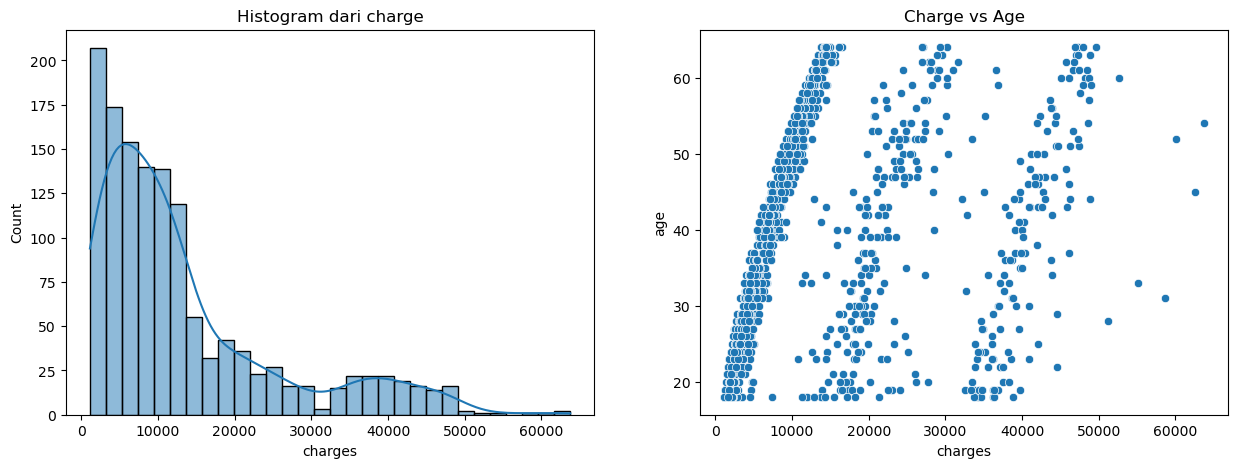

In [8]:
#create canvas
plt.figure(figsize=(15,5))

#plot 1
plt.subplot (1,2,1)
sns.histplot(df.charges, kde=True, bins=30)
plt.title('Histogram dari charge')

#plot 2
plt.subplot(1,2,2)
sns.scatterplot(x='charges', y='age', data=df)
plt.title('Charge vs Age')

plt.show()

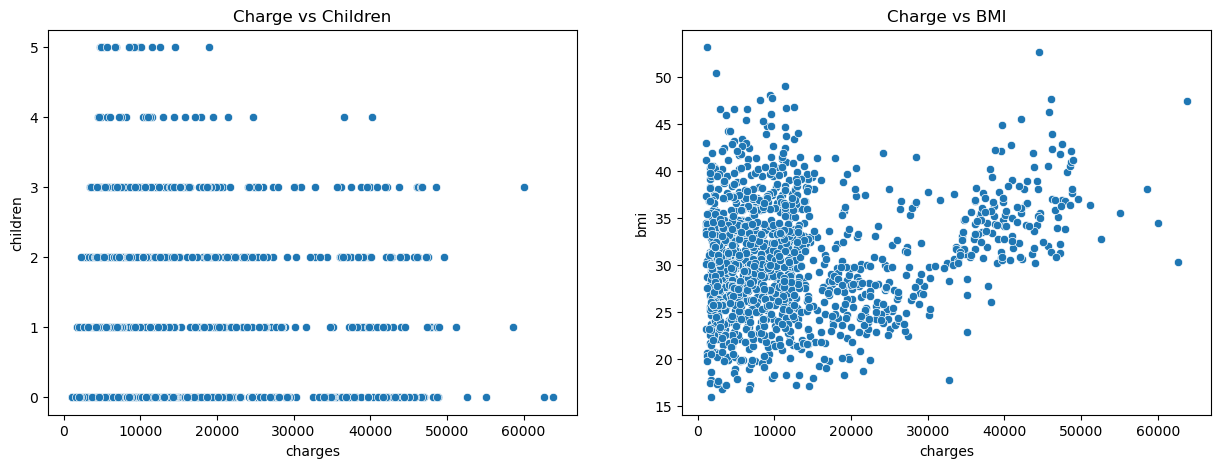

In [9]:
#create canvas
plt.figure(figsize=(15,5))

#plot 3
plt.subplot(1,2,1)
sns.scatterplot(x='charges', y='children', data=df)
plt.title('Charge vs Children')

#plot 4
plt.subplot (1,2,2)
sns.scatterplot(x='charges', y='bmi', data=df)
plt.title('Charge vs BMI')

plt.show()

> Dapat terlihat bahwa persebaran data `charges` tidak normal

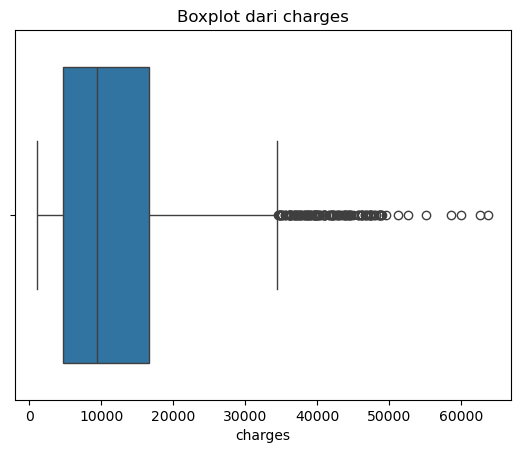

In [10]:
sns.boxplot(x=df['charges'])
plt.title('Boxplot dari charges')
plt.show()

> ditemukan adanya outlier pada data

In [11]:
df['charges'].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

In [12]:
#outlier
q1 = df['charges'].quantile(0.25)
q3 = df['charges'].quantile(0.75)
iqr = q3-q1
low_bound = q1-1.5*iqr
up_bound = q3+1.5*iqr

outlier = df['charges'][(df['charges']<low_bound) | (df['charges']>up_bound)]

print (f"Lower Boundaries : {low_bound}")
print (f"Upper Boundaries : {up_bound}")
print (f"persen outlier : {len(outlier)*100/len(df['charges']):.2f}%")


Lower Boundaries : -13120.716174999998
Upper Boundaries : 34524.777625
persen outlier : 10.40%


> Persentase Outlier lebih dari 10%, bisa di artikan bahwa outlier yang ada bukan karena salah input, tapi memang data real. Sehingga penanganan yang dipilih adalah menggunakan metode capping outlier, karena outlier dibiarkan, membuat analisa data menjadi lebih sulit untuk mendapatkan hasil yang akurat

In [13]:
#log
df['charges_log'] = np.log1p(df['charges'])

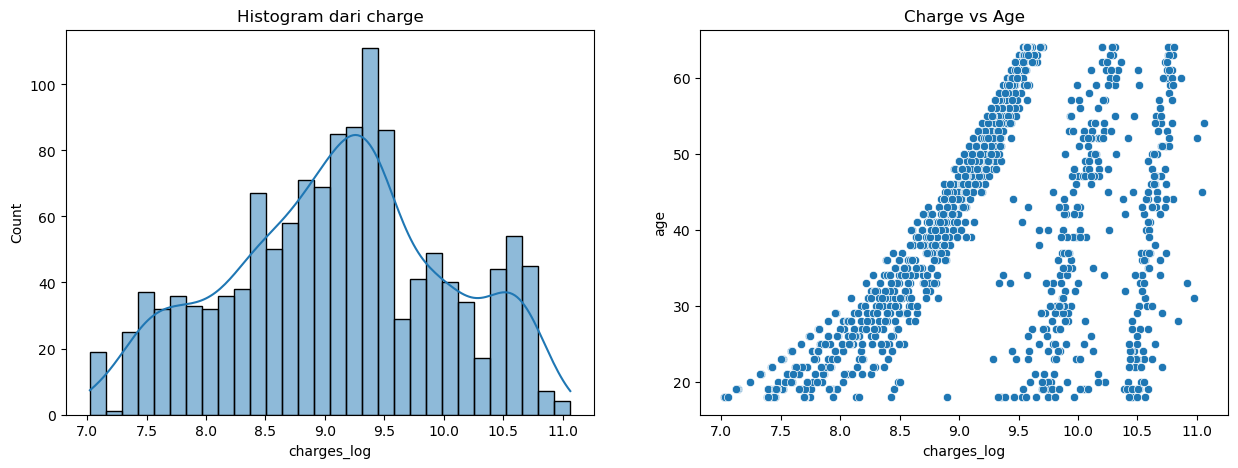

In [14]:
#create canvas
plt.figure(figsize=(15,5))

#plot 1
plt.subplot (1,2,1)
sns.histplot(df.charges_log, kde=True, bins=30)
plt.title('Histogram dari charge')

#plot 2
plt.subplot(1,2,2)
sns.scatterplot(x='charges_log', y='age', data=df)
plt.title('Charge vs Age')

plt.show()

> dapat dilihat pesebaran datanya sudah normal

# V. Feature Engineering

## i. Split X (features) dan y(target)

In [15]:
#split x dan y
x = df.drop(['charges', 'charges_log'], axis=1)
y = df.charges_log

In [16]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [17]:
y.head()

0    9.734236
1    7.453882
2    8.400763
3    9.998137
4    8.260455
Name: charges_log, dtype: float64

## ii. Split Train and Test

In [18]:
#split train and test
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=42)

print (f"train size : {x_train.shape}")
print (f"test size : {x_test.shape}")
print (x_train)

train size : (1069, 6)
test size : (268, 6)
      age     sex     bmi  children smoker     region
1114   23    male  24.510         0     no  northeast
968    21    male  25.745         2     no  northeast
599    52  female  37.525         2     no  northwest
170    63    male  41.470         0     no  southeast
275    47  female  26.600         2     no  northeast
...   ...     ...     ...       ...    ...        ...
1096   51  female  34.960         2    yes  northeast
1131   27    male  45.900         2     no  southwest
1295   20    male  22.000         1     no  southwest
861    38  female  28.000         3     no  southwest
1127   35  female  35.860         2     no  southeast

[1069 rows x 6 columns]


## iii. Missing Value

In [19]:
x_train.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [20]:
x_test.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [21]:
y_train.isnull().sum()

0

In [22]:
y_test.isnull().sum()

0

## iv. Cardinality Check

In [23]:
num_col = ['age','bmi','children']
cat_col = ['sex','smoker','region']

x_train_num = x_train[num_col]
x_test_num = x_test[num_col]

x_train_cat = x_train[cat_col]
x_test_cat = x_test[cat_col]

In [24]:
x_train_num.head()

,age,bmi,children
1114,23,24.510,0
968,21,25.745,2
599,52,37.525,2
170,63,41.470,0
275,47,26.600,2


## v. Feature Scaling

In [25]:
#scaling Method
scaler = MinMaxScaler()
#.fit
scaler.fit(x_train_num)
#.transform
x_train_num_scaled = scaler.transform(x_train_num)
x_test_num_scaled = scaler.transform(x_test_num)


In [26]:
x_train_num_scaled

array([[0.10869565, 0.23002421, 0.        ],
       [0.06521739, 0.26324993, 0.4       ],
       [0.73913043, 0.58017218, 0.4       ],
       ...,
       [0.04347826, 0.16249664, 0.2       ],
       [0.43478261, 0.32391714, 0.6       ],
       [0.36956522, 0.53537799, 0.4       ]])

## vi. Feature Encoding

In [27]:
print (x_train_cat.sex.unique())
print (x_train_cat.smoker.unique())
print (x_train_cat.region.unique())
x_train_cat.head()

['male' 'female']
['no' 'yes']
['northeast' 'northwest' 'southeast' 'southwest']


,sex,smoker,region
1114,male,no,northeast
968,male,no,northeast
599,female,no,northwest
170,male,no,southeast
275,female,no,northeast


In [28]:
encoder = OneHotEncoder(categories=[
    ['female','male'], ['no','yes'],['northwest','northeast','southeast','southwest']
    ], sparse_output=False)
encoder.fit(x_train_cat)
x_train_cat_encoded = encoder.transform(x_train_cat)
x_test_cat_encoded = encoder.transform(x_test_cat)

In [29]:
x_train_cat_encoded

array([[0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [30]:
x_train_final = np.concatenate([x_train_cat_encoded, x_train_num_scaled], axis=1)
x_test_final = np.concatenate([x_test_cat_encoded, x_test_num_scaled], axis=1)
x_train_final

array([[0.        , 1.        , 1.        , ..., 0.10869565, 0.23002421,
        0.        ],
       [0.        , 1.        , 1.        , ..., 0.06521739, 0.26324993,
        0.4       ],
       [1.        , 0.        , 1.        , ..., 0.73913043, 0.58017218,
        0.4       ],
       ...,
       [0.        , 1.        , 1.        , ..., 0.04347826, 0.16249664,
        0.2       ],
       [1.        , 0.        , 1.        , ..., 0.43478261, 0.32391714,
        0.6       ],
       [1.        , 0.        , 1.        , ..., 0.36956522, 0.53537799,
        0.4       ]])

## vii. Model Definition

> Algoritma yang dipakai : `LinearRegression`  
karena dataset yang digunakan cukup simple, dan target yang akan dicapai `(charges_log)`  
> Metrics yang dipakai : `MAE`  
karena untuk melihat sejauh mana error dari prediksinya

In [31]:
model = LinearRegression()

## viii. Model Training

In [32]:
#Train the model
model.fit(x_train_final, y_train)

LinearRegression()

## ix. Model Evaluation

In [33]:
#predict Train dan Test
y_pred_train = model.predict(x_train_final)
y_pred_test = model.predict(x_test_final)

print (y_pred_train)

[8.078125   8.2265625  9.46484375 ... 7.94921875 8.90625    8.77734375]


In [34]:
y_train

1114     7.782013
968      8.095863
599     10.418494
170      9.503487
275      9.181616
          ...    
1096    10.706435
1131     8.214581
1295     7.583644
861      8.875160
1127     8.672061
Name: charges_log, Length: 1069, dtype: float64

In [35]:
#evaluate the model
print ('Error - Train : ', mean_absolute_error(y_train, y_pred_train))
print ('Error - Test : ', mean_absolute_error(y_test, y_pred_test))

y_pred_original = np.expm1(y_pred_test)
y_test_original = np.expm1(y_test)

mae_original = mean_absolute_error(y_test_original, y_pred_original)

print (f"MAE pada original scale : {mae_original:.2f}")



Error - Train :  0.2841224373632426
Error - Test :  0.26052147020243027
MAE pada original scale : 3755.78


## x. Model saving for inference

In [36]:
with open('model.pkl', 'wb') as file_1:
    pickle.dump (model, file_1)
with open('model_scaler.pkl', 'wb') as file_2:
    pickle.dump (scaler, file_2)
with open('model_encoder.pkl', 'wb') as file_3:
    pickle.dump (encoder, file_3)
with open('num_col.txt', 'w') as file_4:
    json.dump (num_col, file_4)
with open('cat_col.txt', 'w') as file_5:
    json.dump (cat_col, file_5)
